<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/Gorev10_Mert_G%C3%BCney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kendi bulduğunuz bir veri setiyle "sınıflandırma" modeli geliştirilecek ve değerlendirilecektir.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn import metrics

In [29]:
df = pd.read_csv("online_shoppers_intention.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [30]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [31]:
# Kategorik değişkenleri sayısal değerlere dönüştürmeye yarar, get_dummies yerine araştırdım.
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [32]:
df['Revenue'].value_counts()

,count
Revenue,
0,10422
1,1908


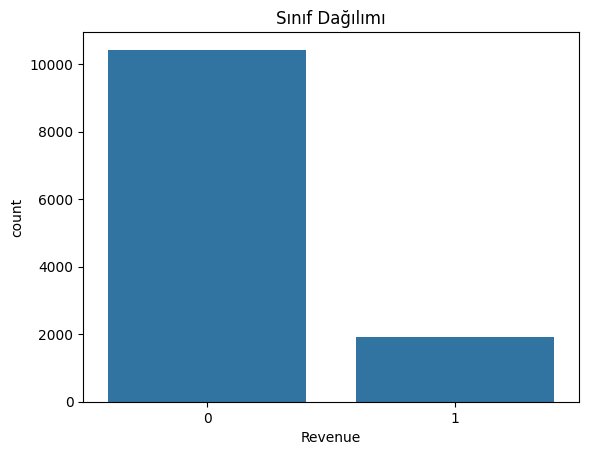

In [33]:
sns.countplot(x='Revenue', data=df)
plt.title('Sınıf Dağılımı')
plt.show()

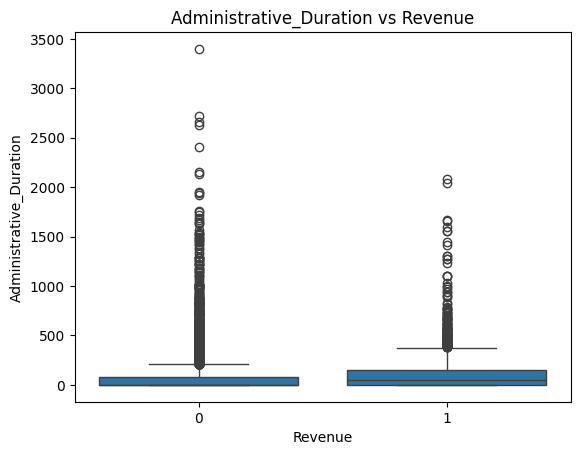

In [34]:
sns.boxplot(x='Revenue', y='Administrative_Duration', data=df)
plt.title('Administrative_Duration vs Revenue')
plt.show()

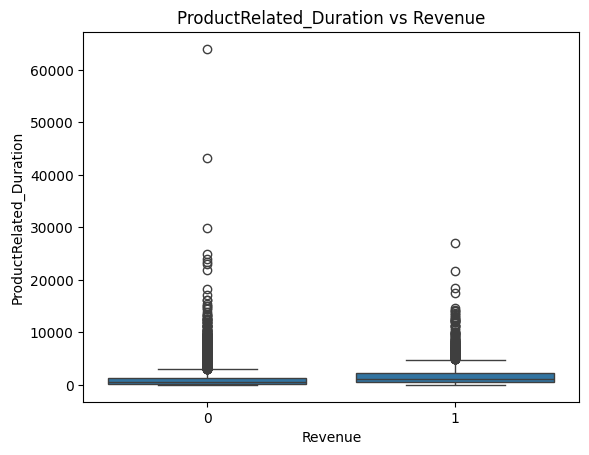

In [35]:
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title('ProductRelated_Duration vs Revenue')
plt.show()

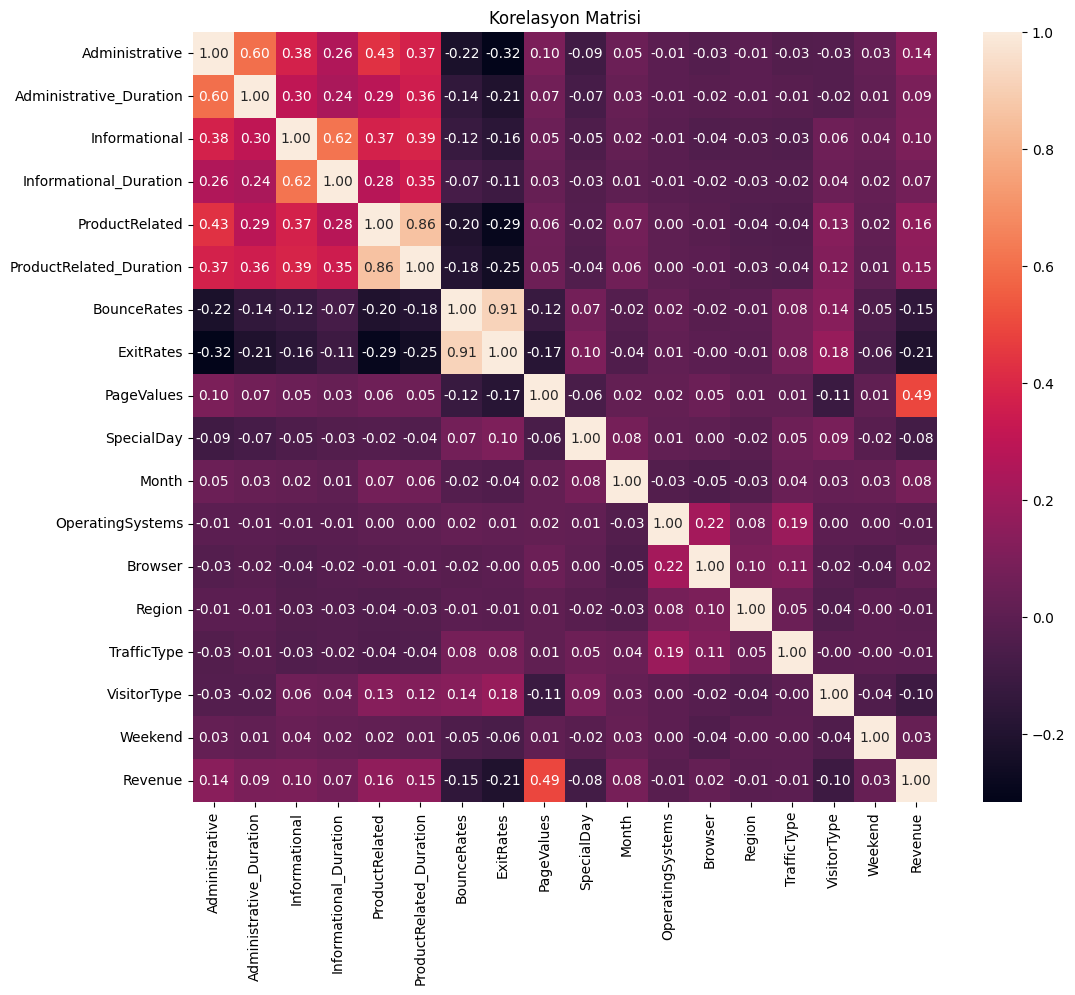

In [36]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [37]:
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
y_pred = log_model.predict(X_test_scaled)

In [41]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8832116788321168


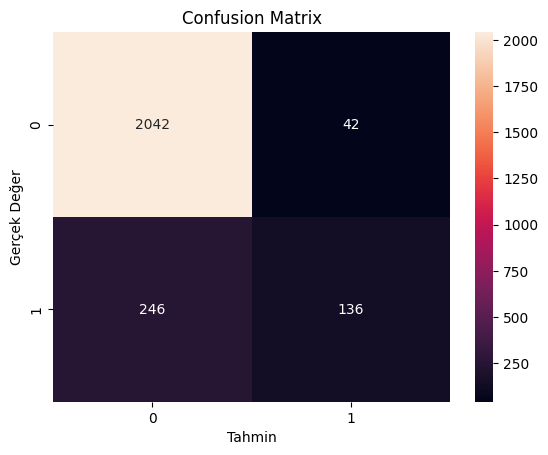

In [43]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')   # Confusion Matrix kısmı burada
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin')
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



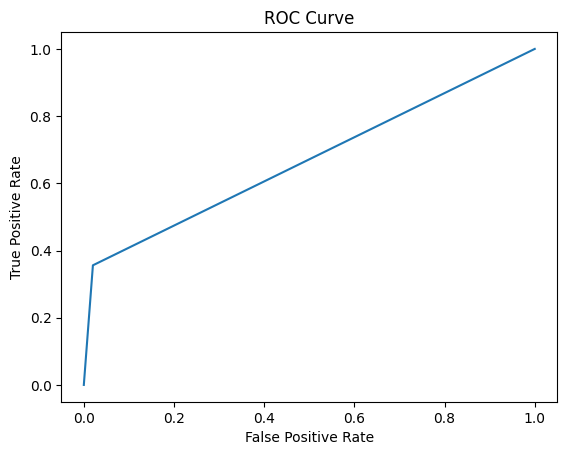

In [45]:
y_pred = log_model.predict(X_test_scaled)

fpr, tpr, esik = metrics.roc_curve(y_test, y_pred) # ROC eğrisi için gerekli metrikler.

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()